In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from ipywidgets import interact
import ipywidgets as widgets
import mpbScript

In [39]:
data = mpbScript.parseMpbFull("fol/D73-10_СОП22-С_20А.mpb")
print(f"{data.data_size} {data.metrsPerPoint}")
print(len(data.channels))

24652 0.0625
24


In [40]:
x = np.linspace(0, data.data_size*data.metrsPerPoint,data.data_size)
y = np.array(data.channels[0])
y2 = 5*np.array(data.channels[16])+3
plt.plot(x,y2, label='Tolsh')
plt.plot(x, y, label='Deff')
plt.legend()
print(f"{data.data_size} {len(y)}")
plt.show()

24652 24652


In [8]:
 %matplotlib inline

In [35]:

def f(filter_freq):
    sos = signal.butter(2, filter_freq, 'hp', fs=4000, output='sos')
    y2 = signal.sosfilt(sos, y)
    plt.plot(x, y)
    plt.plot(x, 3*y2)
    plt.show()
    
interact(f, filter_freq=26)


interactive(children=(IntSlider(value=26, description='filter_freq', max=78, min=-26), Output()), _dom_classes…

<function __main__.f(filter_freq)>

In [13]:
y = np.array(data.channels[0])
ps = np.abs(np.fft.fft(y))**2

time_step = 1 / 4000
freqs = np.fft.fftfreq(y.size, time_step)
idx = np.argsort(freqs)
N = len(freqs[idx])
print(freqs[idx][0:int(N/2)])
plt.plot(np.abs(freqs[idx][0:int(N/2)]), ps[idx][0:int(N/2)])
plt.xlim(0,20)
plt.show()

[-2.00000000e+03 -1.99980206e+03 -1.99960412e+03 ... -5.93824228e-01
 -3.95882819e-01 -1.97941409e-01]


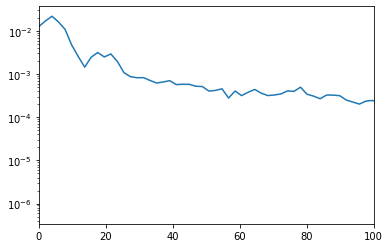

In [11]:
y = np.array(data.channels[0])
f, Pxx_spec = signal.welch(y, 4000, 'flattop', 2048, scaling='spectrum',average='median')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlim(0,100)
plt.show()

In [36]:

def f(filter_freq):
    sos = signal.butter(1,filter_freq, 'hp', fs=4000, output='sos')
    y_t = np.array(data.channels[16])
    y2 = np.abs(signal.sosfilt(sos, y_t))
    plt.plot(x, y_t)
    plt.plot(x, 3*y2)
    plt.show()
    
interact(f, filter_freq=widgets.IntSlider(min=1, max=30, step=1, value=7))

interactive(children=(IntSlider(value=7, description='filter_freq', max=30, min=1), Output()), _dom_classes=('…

<function __main__.f(filter_freq)>

In [41]:

sos = signal.butter(2, 26, 'hp', fs=4000, output='sos')

y2 = 5*signal.sosfilt(sos, y)

sos2 = signal.butter(1,7, 'hp', fs=4000, output='sos')
y_t2 = np.array(data.channels[16])+0.6
y_t = np.abs(10*signal.sosfilt(sos2, y_t2))
    
   
def f(hl,h2):
    hl = hl/100
    h2 =h2/100
#     plt.plot(x, y)
    plt.plot(x, y_t , label='Tolsh')
    plt.plot(x, y2, label='Deff')
    size= len(x)
    idx = np.argwhere(np.diff(np.sign(hl - y_t))).flatten()
    plt.plot(x[idx], y_t[idx], 'ro')
#     idx = np.argwhere(np.diff(np.sign(h2 - y_t))).flatten()
#     plt.plot(x[idx], y_t[idx], 'ro')
    bar = x < 0
    for id in x[idx]:
        bar |= ((x > x[int(id)]) & (x < x[min(int(id)+200,size-1)]))
        
    plt.fill_between(x, -1, 1, where=((y_t > hl) | bar ), color='green', alpha=0.2)
    
    plt.ylim(-1, 1)
#     plt.xlim(10000, 25000)
    plt.axhline(hl)
    plt.axhline(h2)
    plt.legend()
    plt.show()
    
interact(f, hl=18,h2=-21)




interactive(children=(IntSlider(value=18, description='hl', max=54, min=-18), IntSlider(value=-21, description…

<function __main__.f(hl, h2)>